Import needed libraries

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import read_excel
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array
from statsmodels.graphics.tsaplots import plot_pacf
from tensorflow import keras

Train LSTM torque predictior model

10


C:\Users\malth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1226
Epoch 2/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1219
Epoch 3/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1051
Epoch 4/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1262
Epoch 5/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1126
Epoch 6/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1148
Epoch 7/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0729
Epoch 8/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0754
Epoch 9/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0732
Epoch 10/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0898
Epoch 11/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1027
Epoch 12/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0824
Epoch 13/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0996
Epoch 14/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0856
Epoch 15/100
12

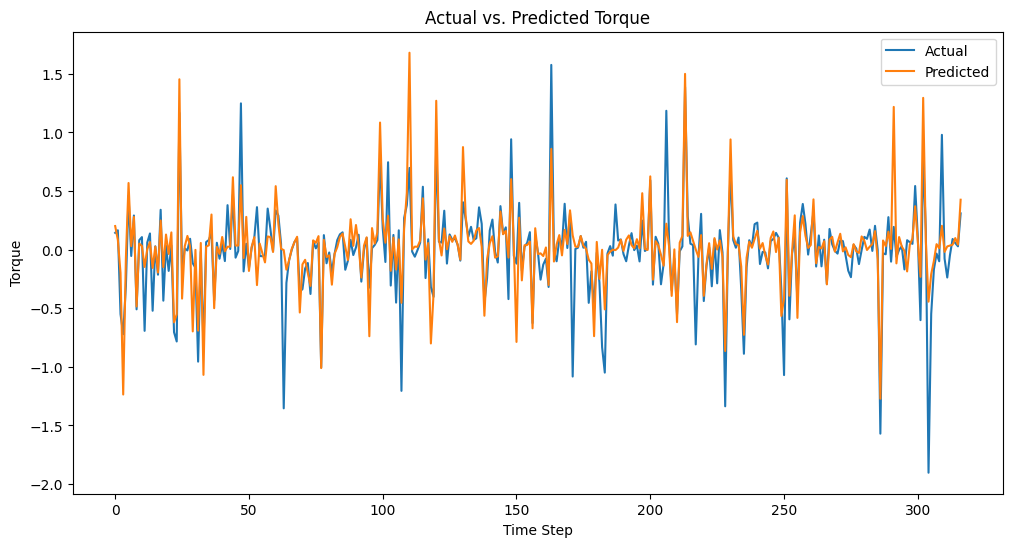

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Assuming you have your torque and angle data in a DataFrame named 'data'
# with columns 'torque' and 'angle'
newTorque2 = pd.read_excel('torques3.xlsx')
newAngle2 = pd.read_excel('angles3.xlsx')
combinedSeries = concat([newTorque2['torque'],newAngle2['angle']], axis=1)
combinedSeries.columns = ['torque','angle']
data = combinedSeries

# Create a new DataFrame with the desired lagged values

data['torque_lag_1'] = data['torque'].shift(1)
data['torque_lag_2'] = data['torque'].shift(2)
data['torque_lag_3'] = data['torque'].shift(3)
data['torque_lag_4'] = data['torque'].shift(4)
data['torque_lag_5'] = data['torque'].shift(5)
data['angle_lag_1'] = data['angle'].shift(1)
data['angle_lag_2'] = data['angle'].shift(2)
data['angle_lag_3'] = data['angle'].shift(3)
data['angle_lag_4'] = data['angle'].shift(4)
data['angle_lag_5'] = data['angle'].shift(5)

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features (X) and target (y)
X = data[['torque_lag_5','angle_lag_5', 'torque_lag_4','angle_lag_4', 'torque_lag_3','angle_lag_3', 'torque_lag_2','angle_lag_2', 'torque_lag_1','angle_lag_1']]
y = data['torque']


# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape[1])
# Reshape data for LSTM input
X_train = X_train.values.reshape(X_train.shape[0], 5, 2)  # Reshape to (samples, timesteps, features)
X_test = X_test.values.reshape(X_test.shape[0], 5, 2)
# Create LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(5,2)))
model.add(LSTM(units=50))
model.add(Dense(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Make predictions
predictions = model.predict(X_test)
# Invert normalization to get actual torque values
predictions_inv = predictions#torque_scaler.inverse_transform(predictions)
import matplotlib.pyplot as plt
# Create a figure and axes
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions_inv, label='Predicted')
plt.title('Actual vs. Predicted Torque')
plt.xlabel('Time Step')
plt.ylabel('Torque')
plt.legend()
plt.show()

Train DNN weight Classifier

Epoch 1/5


C:\Users\malth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7609 - loss: 0.5929 - val_accuracy: 0.9373 - val_loss: 0.1470
Epoch 2/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9480 - loss: 0.1360 - val_accuracy: 0.9832 - val_loss: 0.0779
Epoch 3/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9779 - loss: 0.0662 - val_accuracy: 0.9402 - val_loss: 0.4392
Epoch 4/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9844 - loss: 0.0625 - val_accuracy: 0.9923 - val_loss: 0.0280
Epoch 5/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9893 - loss: 0.0372 - val_accuracy: 0.9799 - val_loss: 0.0515
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9852 - loss: 0.0509
Epoch 1/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7567 - loss: 0.6246 - val_accuracy: 0.8913 - val_loss: 0.3134
Epoch 2/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9394 - loss: 0.1646 - val_accuracy: 0.9708 - val_loss: 0.0718
Epoch 3/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/

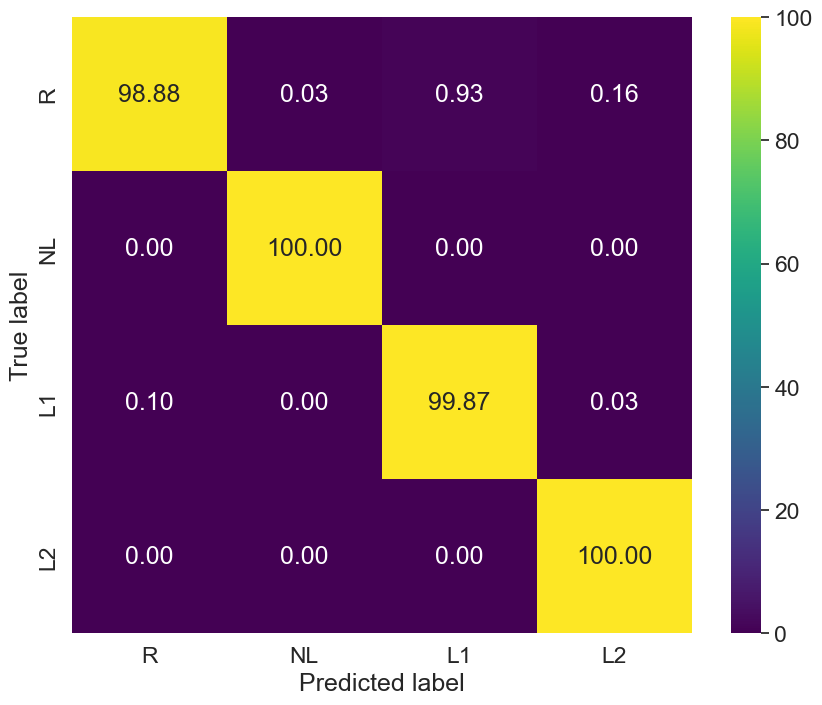

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.metrics import confusion_matrix


### Load data

data = []
# "Rest" data
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLoadRest/dataLouisLoadRest0001.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLoadRest/dataLouisLoadRest0002.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLoadRest/dataMaltheLoadRest0001.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLoadRest/dataMaltheLoadRest0002.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadRest/dataNickNoLoadRest0001.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadRest/dataNickNoLoadRest0002.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadRest/dataNickNoLoadRest0003.xls",header=None), 0])

# No-load flexed data
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisNoLoadFlexed/dataLouisNoLoadFlexed0001.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisNoLoadFlexed/dataLouisNoLoadFlexed0002.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheNoLoadFlexed/dataMaltheNoLoadFlexed0001.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheNoLoadFlexed/dataMaltheNoLoadFlexed0002.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadFlexed/dataNickNoLoadFlexed0001.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadFlexed/dataNickNoLoadFlexed0002.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadFlexed/dataNickNoLoadFlexed0003.xls",header=None), 1])

# Load 1 flexed data
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLoadFlexed/dataLouisLoadFlexed0001.xls",header=None), 2])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLoadFlexed/dataLouisLoadFlexed0002.xls",header=None), 2])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLoadFlexed/dataMaltheLoadFlexed0001.xls",header=None), 2])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLoadFlexed/dataMaltheLoadFlexed0002.xls",header=None), 2])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLoadFlexed/dataNickLoadFlexed0001.xls",header=None), 2])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLoadFlexed/dataNickLoadFlexed0002.xls",header=None), 2])
#data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLoadFlexed/dataMaltheLoadFlexed0003.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLoadFlexed/dataNickLoadFlexed0003.xls",header=None), 2])

# Load 2 (large load) flexed data
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLargeLoadFlexed/dataLouisLargePayload0001.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLargeLoadFlexed/dataLouisLargePayload0002.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLargePayload/MaltheLargeLoadFlexed/dataMaltheLargeLoadfsrFlexed0001.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLargePayload/MaltheLargeLoadFlexed/dataMaltheLargeLoadfsrFlexed0002.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLargeLoadFlexed/dataNickLargePayload0001.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLargeLoadFlexed/dataNickLargePayload0002.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLargeLoadFlexed/dataNickLargePayload0003.xls",header=None), 3])
# Combine into a single DataFrame
## Separate Data and labels
datax = [dat[0] for dat in data]
labels = [lab[1] for lab in data]

# Assign labels to dataframe
for i in range(len(datax)):
  datax[i]['label'] = labels[i]

datax = pd.concat(datax, ignore_index=True)


# Shuffle the data
datax = datax.sample(frac=1).reset_index(drop=True)

### Preprocess the datax
features = datax.drop('label', axis=1)
labels = datax['label']

# Normalize features
scaler = StandardScaler()
features = scaler.fit_transform(features)
# Split the data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Normalisation of data
mean_cols = np.mean(x_train, axis=0)
std_cols = np.std(x_train, axis=0)
                                                          # Normalization: mean = 0 and std = 1
X_train_norm_1 = (x_train - mean_cols)/std_cols         # Training set mean and std will be used for test normalization
X_test_norm_1 = (x_test - mean_cols)/std_cols           # Each column will have mean = 0 and std = 1

# SOMI are following 4 lines
X_train_sort = np.sort(X_train_norm_1, axis=1,)
X_test_sort = np.sort(X_test_norm_1, axis=1)
X_train_norm = X_train_sort/np.max(abs(X_train_sort), axis = 1)[:,None]
X_test_norm = X_test_sort/np.max(abs(X_test_sort), axis = 1)[:,None]
x_train=X_train_norm
x_test=X_test_norm

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)

### Model
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_dim=8),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(4, activation='softmax')
    ])
    # Compile the model with a lower learning rate and gradient clipping
    optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Setup callbacks for monitoring
callbacks = [
    TensorBoard(log_dir='./logs'),
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras')
]

# Initialize k-fold cross-validation
kf = KFold(n_splits=5)

# Initialize list to store accuracy scores
accuracy_scores = []
loss_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(x_train):
    X_train, X_test = x_train[train_index], x_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]

    # Create instance of the model
    modelW = create_model()

    # Train the model
    modelW.fit(X_train, Y_train, epochs=5, validation_split=0.1, callbacks=callbacks)

    # Predict on the test set
    #y_predicted = np.argmax(model.predict(x_test),axis=1)
    #y_test_= np.argmax(y_test,axis=1)

    # Calculate accuracy and store it
    loss, accuracy = modelW.evaluate(X_test, Y_test)

    accuracy_scores.append(accuracy)
    loss_scores.append(loss)

# Display accuracy and loss values
print("Accuracy values:", accuracy_scores)
print("Loss values:", loss_scores)

# Display average accuracy and loss
avg_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

avg_loss = np.mean(loss_scores)
print(f"Average Loss: {avg_loss:.4f}")
# Create instance of the model
modelW = create_model()

# Train the model
modelW.fit(x_train, y_train, epochs=10, validation_split=0.1, callbacks=callbacks)

# Calculate accuracy and loss
loss, accuracy = modelW.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")
# Predicting the labels for the test set
test_prediction = modelW.predict(x_test)
y_predicted = np.argmax(test_prediction, axis=1)
y_test_ = np.argmax(y_test, axis=1)

# Generating the confusion matrix
cm = confusion_matrix(y_test_, y_predicted, normalize='true')

# Convert to percentage
cm_percentage = cm * 100

sns.set(font_scale=1.5)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="viridis", xticklabels=['R','NL', 'L1', 'L2'], yticklabels=['R','NL', 'L1', 'L2'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
#plt.title('Normalized Confusion Matrix (Percentage)')
plt.savefig('ConfusionMatrix4class.svg', format='svg')
plt.show()

Connect Armband

Attempting connection... Please wait.
['COM81', 'COM86', 'COM87']

Handshaking at port: COM81
Handshaking at port: COM86
Handshaking at port: COM87
Bytes inWaiting: 3
Acknowledgement recieved: b'1'
BioX device found at port: COM87
Connected = True
Calibrating... Close fist.
Calibration finished.


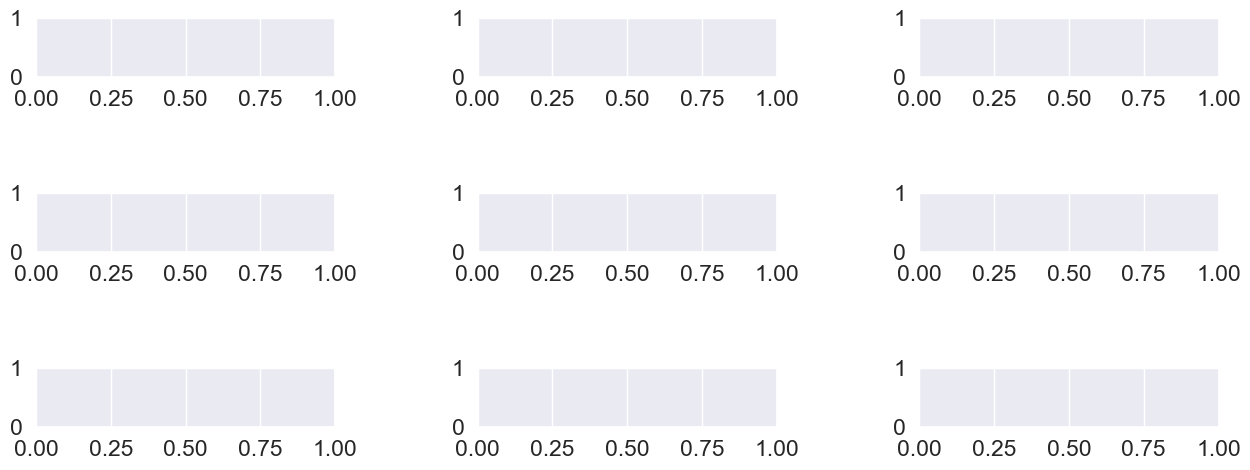

In [191]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug  5 14:14:03 2020

@author: dlsgrd
"""

import sys
import time
import serial
import struct
import datetime as dt
from dataclasses import dataclass
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import itertools
import matplotlib.cm as cm
import cv2
import os

# From https://stackoverflow.com/questions/12090503/listing-available-com-ports-with-python
def get_serial_ports():
    """
    Lists serial ports.
    :return: ([str]) A list of available serial ports
    """
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        #ports = glob.glob('/dev/tty[A-Za-z]*')
        #ports = glob.glob('/dev/[A-Za-z]*')
        ports = glob.glob('/dev/rfcomm*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    results = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            results.append(port)
        except (OSError, serial.SerialException):
            pass
    print("{}\n".format(results))
    return results

class Armband:
    def __init__(self):
        super(Armband, self).__init__()
        
        self.baud = 250000
        self.dataNumBytes = 1
        self.CONNECTED = False
        self.POST_PROCESSING_DONE = False
        self.PREDICTING = True
        self.s = serial.Serial(baudrate=self.baud,timeout=3, write_timeout=3,bytesize=8)

        self.parameters = {
            "default_sampletime": 10,
            "recording_window_length" : 6000
        }
        
        self.plots = {

            "plot_axes" : 1,
            "last_plot_time" : 0,
            "gestures" : ["open", "close", "pronation"],
            "gesture_name" : 0,
            "plot_history_time" : 3,   
            "update_plot_time" : 0.5,
            "indices_2_plot" : list([[0,1,2,3,4,5,6,7],[8,9,10],[11,12,13],[14,15,16],[17,18,19],[20]]),
            "data_info" : list(['FSRs (voltage)','Gravity (m/sec^2)','Angular Velocity (rad/sec)','Linear Acceleration (m/sec^2)','Euler Angles (deg)','Battery (%)']),
            "data_y_limit" : list([[0, 4],[-10, 10],[-200, 200],[-20, 20],[-400, 400],[0, 100]]),
            "plotting_data" : np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]),
            "default_plotting_data" : np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]),
            "sampling_frequency" : 1000
        }

        self.data_struct = {
            "raw": {}
        }
        
        self.headers = {
            "fsr" : ["FSR_1","FSR_2","FSR_3","FSR_4","FSR_5","FSR_6","FSR_7","FSR_8"],
            "gravity" : ["GRAVITY_X","GRAVITY_Y","GRAVITY_Z"],
            "angular_velocity" : ["ANGULAR_VELOCITY_X","ANGULAR_VELOCITY_Y","ANGULAR_VELOCITY_Z"],
            "linear_acceleration" : ["LINEAR_ACCELERATION_X","LINEAR_ACCELERATION_Y","LINEAR_ACCELERATION_Z"],
            "euler_angle" : ["EULER_ANGLE_X","EULER_ANGLE_Y","EULER_ANGLE_Z"],
            "battery" : ["Battery"],
        }
        self.headers["imu"] = self.headers["gravity"]  + self.headers["angular_velocity"] + self.headers["linear_acceleration"] + self.headers["euler_angle"]
        self.headers["full"] = self.headers["fsr"] + self.headers["imu"] + self.headers["battery"] + ["t"]

    def connect(self):
        print("Attempting connection... Please wait.")
        serial_ports = get_serial_ports() 
        for serial_port in serial_ports:
            self.s.port = serial_port
            print("Handshaking at port: {}".format(serial_port))
            try:
                self.s.open()
                self.s.write(b'0')
                time.sleep(1)
                print("Bytes inWaiting: {}".format(self.s.in_waiting))
                handshake_return = self.s.read(1)
                print("Acknowledgement recieved: {}".format(handshake_return))               
                if handshake_return == b'1':
                    print("BioX device found at port: {}".format(serial_port))
                    self.CONNECTED = True
                    print("Connected = {}".format(self.CONNECTED))
                    self.s.reset_input_buffer()
                    break
                else:
                    self.s.close()
                    print("no device")    
            except:
                if self.s.is_open:
                    self.s.close()
                continue

    def calibrate(self):
        print("Calibrating... Close fist.")        
        time.sleep(0.1)
        self.s.write(b'5')
        time.sleep(15)
        print("Calibration finished.")


    def reset_gain(self):        
        self.s.write(b'4')
        print("Gain reset.")


    def start_transmission(self):        
        self.s.write(b'2')
        time.sleep(0.01)
        #print("Transmission started...")


    def stop_transmission(self):
               
        self.s.write(b'3')
        time.sleep(0.01) 
        #print("Transmission stopped.")
        while self.s.in_waiting > 0:
            self.s.read(self.s.in_waiting)
            time.sleep(0.01)


    def close_connection(self):        
        self.s.write(b'6')
        self.s.flushInput()
        self.s.close()
        self.s.__del__()
        print("Disconnected")


    def reset_session(self):        
        self.POST_PROCESSING_DONE = False
        self.data_struct = {
            "raw": {},
            "raw_cut": {},
            "cut_rms": {},
            "svm_data": pd.DataFrame,  
            "testing_data": []
        }


    def get_sample(self):        
        data_buffer = list()
        data = self.s.read(212)
        for i in range(20):
            data_decoded = list()
            if len(data) == 212:
                for j in range(8):
                    dataDecode = data[(i*8)+(j*1) : (i*8)+(1+j*1)]
                    value, = struct.unpack('B', dataDecode)
                    data_decoded.append(value * 3.3/255)
                data_buffer.append(data_decoded)
            else:
                data_decoded = [1,1,1,1,1,1,1,1]            
        imu_decoded = list()
        if len(data) == 212:
            for i in range(12):
                imuDecode = data[160+i*4 : 160+4+i*4]
                value_imu, = struct.unpack('f', imuDecode)            
                imu_decoded.append(value_imu)
        else:
            imu_decoded = [1,1,1,1,1,1,1,1,1,1,1,1]  
        battery_decoded = list()
        if len(data) == 212:
            for i in range(1):
                batteryDecode = data[208+i*4 : 208+4+i*4]
                value_battery, = struct.unpack('f', batteryDecode)            
                battery_decoded.append(value_battery)
        else:
            battery_decoded = [1]            
        for sample in range(len(data_buffer)):
            data_buffer[sample].extend(imu_decoded + battery_decoded + [time.time()])#battery_decoded
        return data_buffer

    
    def sample_for_time(self, sampletime=10, gestures=None, gesture_name = None):  

        window_length = self.parameters["recording_window_length"]
        sampling_frequency = self.plots["sampling_frequency"]
        self.plots["last_plot_time"] = time.time()
        self.plots["gesture_name"] = gesture_name
        self.initialize_plot_properties(clear_axes=1)
        plot_history_time = self.plots["plot_history_time"]
        data_storage = list()
        st = time.time()
        t = 0
        self.start_transmission()
        while t < sampletime:
            a = list()
            while len(a) < window_length and t < sampletime:
                if self.PREDICTING:
                    new_samples = self.get_sample()
                    a.extend(new_samples)
                    self.plots["plotting_data"] = np.vstack([self.plots["plotting_data"], new_samples])
                    self.running_plot(testing_status = 0, predicted_result = 0)
                    t = time.time() - st
                else:
                    print("Exiting...")
                    break
            data_storage.extend(a)
            total_length = len(self.plots["plotting_data"])
            self.plots["plotting_data"] = self.plots["plotting_data"][total_length - (plot_history_time*sampling_frequency + (int)(sampling_frequency/2)): (total_length - 1),:]
        if len(a) < window_length:    
            data_storage.extend(a)
        self.stop_transmission()
        print("Length of data is {} samples. Samplerate over {} seconds is {} hz.".format(len(data_storage), round(t, 3), round(len(data_storage)/t)))
        return data_storage
    
    def sample_gestures(self, sampletime=10, gestures=None):        
        if type(gestures) != list:
            print("Please input gestures as list.")
            return
        elif type(gestures) == list:
            for gesture in gestures:
                print("Recording: {}".format(gesture))
                temp = self.sample_for_time(sampletime=sampletime,gestures=gestures, gesture_name = gesture)
                if gesture in self.data_struct["raw"]:
                    self.data_struct["raw"][gesture].extend(temp)
                elif not gesture in self.data_struct["raw"]:
                    self.data_struct["raw"][gesture] = temp
            print("Gestures recorded: {}".format(gestures))
            return self.data_struct["raw"]


    ## plot functions
    def initialize_plot_properties(self, clear_axes=None):
        
        if (clear_axes == 0):
            plt.close('all')
            fig, axs_plot = plt.subplots(3, 3, figsize=(14,6)) ## number and size of subplots can be changed from here 
            fig.tight_layout(pad=3.0)
            time.sleep(1)
            self.plots["plotting_data"] = self.plots["default_plotting_data"]
        else:
            axs_plot = self.plots["plot_axes"]
            for i in range(3):
                for j in range(3): 
                    axs_plot[i,j].clear()
            self.plots["last_plot_time"] = time.time()
            self.plots["plotting_data"] = self.plots["default_plotting_data"]

        self.plots["plot_axes"] = axs_plot
        

    def running_plot(self, testing_status = 0, predicted_result = 0): 
        
        gesture_name = self.plots["gesture_name"]
        last_plot_time = self.plots["last_plot_time"]
        axs_plot = self.plots["plot_axes"]
        gestures = self.plots["gestures"]
        indices_2_plot = self.plots["indices_2_plot"]
        data_info = self.plots["data_info"]
        data_y_limit = self.plots["data_y_limit"]
        update_plot_time  = self.plots["update_plot_time"]
        plot_history_time = self.plots["plot_history_time"]
        total_length = len(self.plots["plotting_data"])
        sampling_frequency = self.plots["sampling_frequency"]
        sample_num_array = np.arange(1, total_length+1, 1)
        data_np = np.array(self.plots["plotting_data"])
        if (time.time() - last_plot_time) > update_plot_time:
             
             last_plot_time = time.time()
             loop = 0
             for i in range(3):
               for j in range(3):
                  
                  if i==2 and j==1:
                        axs_plot[i,j].clear()
                        if(testing_status == 1):
                            if(predicted_result > -1):
                                x = gestures[predicted_result-1]
                            else:
                                x = gestures[0]
                            axs_plot[i, j].set_title('Predicted gesture')
                        else:
                            x = gesture_name
                            axs_plot[i, j].set_title('Gesture to hold')
                        
                        axs_plot[i, j].axis('off') 
                        y = '.jpg'
                        image_name =  x + y
                        cv2_img = cv2.imread(os.path.join('images', image_name))
                        mod_cv2_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
                        axs_plot[i, j].imshow(mod_cv2_img)
                  elif i == 1 and j == 2:
                        axs_plot[i,j].axis('off')    
                  elif i<2:
                        axs_plot[i,j].clear()
                        if(total_length < plot_history_time*sampling_frequency):
                            samples_selected = sample_num_array
                            data_np_fsr = data_np[:,indices_2_plot[loop]]
                        else:
                            samples_selected = sample_num_array[total_length - plot_history_time*sampling_frequency: (total_length - 1)]
                            data_np_fsr = data_np[total_length - plot_history_time*sampling_frequency: (total_length - 1),indices_2_plot[loop]]
                        axs_plot[i, j].plot(samples_selected, data_np_fsr, linewidth=1)
                        axs_plot[i, j].set_ylim(data_y_limit[loop])
                        axs_plot[i, j].set_xlim([total_length-(plot_history_time*sampling_frequency), total_length+(update_plot_time*sampling_frequency)])
                        axs_plot[i, j].grid(color='w', linestyle='--', linewidth=0.5)
                        axs_plot[i, j].set_title(data_info[loop])
                        axs_plot[i, j].get_xaxis().set_visible(False)
                  else:
                        axs_plot[i,j].axis('off')
                        
                  loop = loop + 1
            
             plt.pause(0.001)
            
        self.plots["last_plot_time"] = last_plot_time     

       

if __name__ == '__main__':
    """
    Run example below and follow printed output to try out SDK.
    If you want to create your own data structure:
    - Armband.sample_gestures() returns raw recorded input for defined gestures.

    If you want to sample for time:
    - Armband.sample_for_time(sampletime=10) returns raw data for ten seconds. Change 'sampletime'.

    If you want to control sampleflow:
    - Armband.start_transmission(), starts data flow.
    - Armband.get_sample() returns one sample as list of 20*21.
        - One sample is send every 20 ms.
        - Loop this for however long you want.
    - Armband.stop_transmission(), ends datastream
    """
    #  Main_file
    #- Define gestures to record. Must be list. -#
    Gestures = ["open", "close"] 

    #- Create instance -#
    sa = Armband() 

    sa.plots["gestures"] = Gestures

    sa.initialize_plot_properties(clear_axes=0)

    #- Connect to armband. Remember to pair armband with pc bluetooth. -#
    sa.connect()

    #- Calibrate armband. This is instant. Make a closed fist. -#
    sa.calibrate()
    

Connect motor controller and define needed functions for data transfer

In [17]:
import bluetooth
import serial
import glob
import sys
import time
import struct
baud = 921600
dataNumBytes = 1
CONNECTED = False
POST_PROCESSING_DONE = False
PREDICTING = True
s = serial.Serial(baudrate=baud,timeout=3, write_timeout=3,bytesize=8)
def get_serial_ports():
    """
    Lists serial ports.
    :return: ([str]) A list of available serial ports
    """
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        #ports = glob.glob('/dev/tty[A-Za-z]*')
        #ports = glob.glob('/dev/[A-Za-z]*')
        ports = glob.glob('/dev/rfcomm*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    results = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            results.append(port)
        except (OSError, serial.SerialException):
            pass
    print("{}\n".format(results))
    return results

def connect():
    print("Attempting connection... Please wait.")
    serial_ports = get_serial_ports() 
    for serial_port in serial_ports:
        s.port = serial_port
        print("Handshaking at port: {}".format(serial_port))
        try:
            s.open()
            s.write(b'k')
            time.sleep(1)
            print("Bytes inWaiting: {}".format(s.in_waiting))
            handshake_return = s.read(1)
            print("Acknowledgement recieved: {}".format(handshake_return))               
            if handshake_return == b'M':
                print("Motor device found at port: {}".format(serial_port))
                CONNECTED = True
                print("Connected = {}".format(CONNECTED))
                s.reset_input_buffer()
                break
            else:
                s.close()
                print("no device")    
        except:
            if s.is_open:
                s.close()
            continue
def get_sample():        
        data_buffer = list()
        data = s.read(8)
        if len(data) == 8:
            for j in range(8):
                value = struct.unpack('f', data[j])
                data_buffer.append(value)
        else:
            data_buffer = [0.0,0.0]
        return data_buffer
def readBuffer():
    try:
        # Receive the 8-byte buffer
        decoded = list()
        data = s.read(12)
        print(f"Received data: {data}")
        for i in range(3):
            Decode = data[i*4 : i*4+4]
            value, = struct.unpack('f', Decode)            
            decoded.append(value)
        # Unpack the 8 bytes into 2 floats
        # 'f' denotes a 4-byte float, and '>' denotes big-endian byte order
        #float_values = struct.unpack('>' + 'f' * 2, data)
        print("Decoded floats:", decoded)
        
        return decoded
    
    except Exception as e:
        print(f"Error: {e}")
    

connect()

Attempting connection... Please wait.
['COM10', 'COM11', 'COM71', 'COM73']

Handshaking at port: COM10
Bytes inWaiting: 0
Acknowledgement recieved: b''
no device
Handshaking at port: COM11
Bytes inWaiting: 0
Acknowledgement recieved: b''
no device
Handshaking at port: COM71
Handshaking at port: COM73
Bytes inWaiting: 1
Acknowledgement recieved: b'M'
Motor device found at port: COM73
Connected = True


Run Controller

In [192]:
startT = time.time()
Torques1 = [0.0,0.0,0.0,0.0,0.0]
Torques2 = [0.0,0.0,0.0,0.0,0.0]
angles1 = [0.0,0.0,0.0,0.0,0.0]
TorquePre = 0.0
payloadMass = [0.0,0.1,2.35,3.43]
prevMass = 0.0
mass = 0.0
savedPredictions = list()
#s.write(b'S')
actualTau =list()
predictedTau = list()
angle = list()
armbandData = list()
interactionTorque = list()
saveMass = list()
while startT + 20 > time.time():
# Extract raw values
    sa.start_transmission()
    armbandData = sa.get_sample()
    sa.stop_transmission()
    FSRdata = armbandData[19][0:8]
    #print(FSRdata)
    FSRdata = array(FSRdata)
    #print(FSRdata)
    FSRdata = FSRdata.reshape(1,-1)
    #print(FSRdata)
    FSRdata = scaler.transform(FSRdata.T)
    #print(FSRdata)
    # Normalisation of data
    FSRdataScalednorm = (FSRdata.T - mean_cols)/std_cols         # Training set mean and std will be used for test normalization
    print(FSRdataScalednorm)
    # SOMI 
    FSRdata_sort = np.sort(FSRdataScalednorm, axis=1)
    #print(FSRdata_sort)
    FSRdata_norm = FSRdata_sort[0]/np.max(abs(FSRdata_sort), axis = 1)[:,None]
    #print(FSRdata_norm)
    FSRdata=FSRdata_norm
    prediction = modelW.predict(FSRdata)
    savedPredictions.append(prediction)
    massClass = np.argmax(prediction, axis=1)
    saveMass.append(massClass[0])
    print(massClass)
    #if massClass[0] == 0:
    #    mass = prevMass
    #else:
    mass = payloadMass[massClass[0]]
    prevMass = mass
    #pre1 = str(TorquePre)
    #pre2 = str(mass)
    #s.write(b'G')
    #s.write(b'r')
    #s.write(b'm')
    #s.write(b'p')
    #s.write(b',')
    #s.write(pre1.encode())
    #s.write(b',')
    #s.write(pre2.encode())
    #s.write(b',')
    #s.write(b'T')
    #sample = readBuffer()
    #torque_data1 = sample[0]
    #save_t = torque_data1
    #torque_data1 = np.array(torque_data1)
    #torque_data1 = torque_data1.reshape(-1,1)
    #torque_dataScaled = torque_data1#torque_scaler.transform(torque_data1)
    #angle_data = sample[1]
    #save_a = angle_data
    #angle_dataScaled = angle_data#angle_scaler.transform(angle_data)
    #interactionTorque_data = sample[2]
    #angles1[0] = angles1[1]
    #angles1[1] = angles1[2]
    #angles1[2] = angles1[3]
    #angles1[3] = angles1[4]
    #angles1[4] = angle_dataScaled
    #Torques1[0] = Torques1[1]
    #Torques1[1] = Torques1[2]
    #Torques1[2] = Torques1[3]
    #Torques1[3] = Torques1[4]
    #Torques1[4] = torque_dataScaled
    #Torques2[0] = Torques2[1]
    #Torques2[1] = Torques2[2]
    #Torques2[2] = Torques2[3]
    #Torques2[3] = Torques2[4]
    #Torques2[4] = torque_dataScaled
    #X = [Torques1[0],angles1[0],Torques1[1],angles1[1],Torques1[2],angles1[2],Torques1[3],angles1[3],Torques1[4],angles1[4]]
    #X = np.array(X)
    #X = X.reshape(1, 5, 2)
    #torquePrediction = model.predict(X)
    #forecast = torque_scaler.inverse_transform(torquePrediction)
    #TorquePre = torquePrediction[0][0]#forecast[0][0]
    #print("printing forecast")
    #print(TorquePre)

    #actualTau.append(save_t)
    #predictedTau.append(TorquePre)
    #angle.append(save_a)
    #interactionTorque.append(interactionTorque_data)

[[ 0.23804007  1.2679911   0.37824203  1.02887335 -0.14538808  0.28645166
   0.81658996  0.88284793]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[0]
[[-0.29234037  1.10234358  0.77400155  1.06195046 -0.01312882  0.70082332
   1.04838748  0.61787402]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[2]
[[0.03914741 1.13547308 0.80698151 1.6573383  0.33405173 0.89972172
  2.09147632 1.67776968]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[0]
[[0.55295345 0.95326081 0.54314183 1.88887801 0.33405173 2.0931121
  2.09147632 2.09179142]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[0]
[[0.32091201 0.8538723  0.26281217 2.08734063 0.49937581 1.41354258
  2.09147632 1.9924262 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[0]
[[-0.04372454  0.00906996  0.1473823   2.08734063  0.58203784  1.09862011
   2.04180543  0.8497262 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0]
[[0.15516813 0.22441173 0.21334223 2.08734063 0.61510266 0.81684738
  2.09147632 0.78348272]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0]
[[0.17174252 0.70478953 0

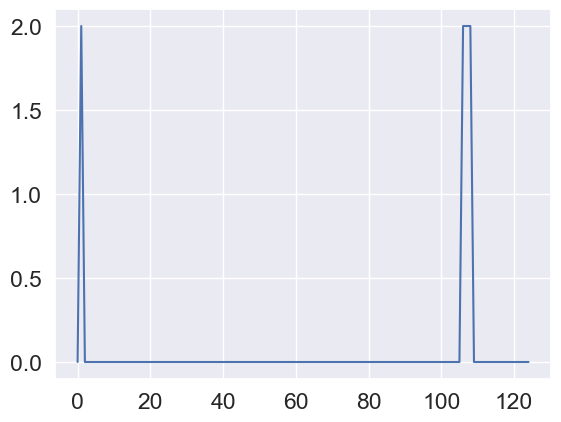

In [193]:
import matplotlib.pyplot as plt
#print(savedPredictions)
#pyplot.plot(actualTau)
#pyplot.plot(predictedTau)
pyplot.plot(saveMass)
#pyplot.plot(savedPredictions)
#pyplot.plot(scaledInteraction)
#pyplot.show()
